In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [174]:
data = pd.read_csv("/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_shifted.csv")

data = data.dropna(axis=0, subset=['fut1fire'])

In [176]:
data = data[pd.to_datetime(data['Date']).dt.strftime('%B') == 'June']

In [177]:
array = data.values

In [222]:
'''plt.clf()
plt.scatter(data['TMAX'], data['VPD'])
plt.scatter(data['TMAX'], data['fut1fire'], c='red')
plt.show()
plt.clf()
plt.scatter(data['PPT'], data['TMAX'])
plt.scatter(data['PPT'], data['fut1fire'], c='red')
plt.show()'''

"plt.clf()\nplt.scatter(data['TMAX'], data['VPD'])\nplt.scatter(data['TMAX'], data['fut1fire'], c='red')\nplt.show()\nplt.clf()\nplt.scatter(data['PPT'], data['TMAX'])\nplt.scatter(data['PPT'], data['fut1fire'], c='red')\nplt.show()"

In [180]:
X = array[:,3:6]
y = array[:,7]

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
  
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train = X_train.astype('float')

y_train = y_train.astype('bool')

X_test = X_test.astype('float')

y_test = y_test.astype('bool')

In [211]:
from imblearn.over_sampling import BorderlineSMOTE 

In [212]:
X_train_res, y_train_res = BorderlineSMOTE().fit_resample(X_train, y_train)

In [213]:
# Making predictions using scikit learn
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#import sklearn.ensemble.RandomForestClassifier

In [214]:
# Create an instance and fit the model 
lr_model = RandomForestClassifier()
lr_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [216]:
# Accuracy
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

Accuracy = 0.932268749691007


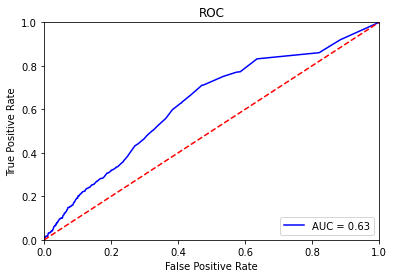

In [221]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 0, 'Relative Importance')

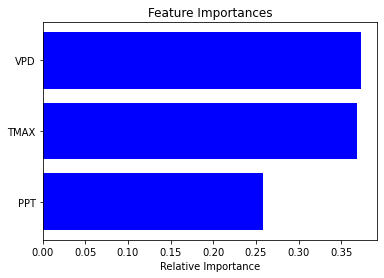

In [225]:
features=data.columns[[3,4,5]]
importances = lr_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')